In [240]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [312]:
#import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [242]:
#read csv file
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [243]:
df.shape

(1460, 81)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [245]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [246]:
#Find the missing values and missing percentage in training data set
missingvalues = df[df.columns].isna().sum()
missingvalues_perc = missingvalues/len(df)*100
missingData = pd.concat([missingvalues, missingvalues_perc],keys=['Total', 'Percentage'],axis=1)
missingData_train = missingData[missingData['Percentage']>0]
missingData_train.sort_values(by='Percentage', ascending=False)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [247]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
df = df[~df['MasVnrArea'].isnull()]

In [248]:
#Drop high percentage missing value
# First 4 - PoolQC, MiscFeature, Alley, Fence
#Drop Electrical for very low missing value
missing_data_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Electrical']
df = df.drop(missing_data_col,axis=1)
df.shape

(1452, 76)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotFrontage    1195 non-null   float64
 4   LotArea        1452 non-null   int64  
 5   Street         1452 non-null   object 
 6   LotShape       1452 non-null   object 
 7   LandContour    1452 non-null   object 
 8   Utilities      1452 non-null   object 
 9   LotConfig      1452 non-null   object 
 10  LandSlope      1452 non-null   object 
 11  Neighborhood   1452 non-null   object 
 12  Condition1     1452 non-null   object 
 13  Condition2     1452 non-null   object 
 14  BldgType       1452 non-null   object 
 15  HouseStyle     1452 non-null   object 
 16  OverallQual    1452 non-null   int64  
 17  OverallCond    1452 non-null   int64  
 18  YearBuil

In [250]:
#drop the id column
df = df.drop(['Id'], axis=1)
df.shape

(1452, 75)

In [251]:
#Find the duplicate records
duplicates = df.duplicated()
duplicates.sum()

#As we see in result, duplicate records are 0.

0

In [252]:
#List the numerical and categorical variables for analysis purpose
df_numerical = df.select_dtypes(include=['int64','float64'])
df_numerical.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [253]:
#categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [254]:
#Analyse the numerical data and check for outliers
df_numerical.shape

(1452, 37)

In [255]:
#function to return the outliers

def get_OutlierPercentage(df_numerical):
    outliers_percentage = {}
    for feature in df_numerical.columns:
        IQR=df_numerical[feature].quantile(.75) - df_numerical[feature].quantile(.25)
        outliers_count=df_numerical[(df_numerical[feature]>(df_numerical[feature].quantile(.75)+1.5*IQR)) | (df_numerical[feature]<(df_numerical[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/df_numerical.shape[0]*100,2)
    return outliers_percentage



In [256]:
#Analyse outliers in numeric variables
outliers_percentage = get_OutlierPercentage(df_numerical)
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df = outlier_df.sort_values(by="Percentage", ascending=False)

outlier_df

,Features,Percentage
29,EnclosedPorch,14.26
9,BsmtFinSF2,11.50
4,OverallCond,8.54
31,ScreenPorch,7.99
0,MSSubClass,7.09
7,MasVnrArea,6.61
1,LotFrontage,6.06
17,BsmtHalfBath,5.65
28,OpenPorchSF,5.17
2,LotArea,4.61


In [257]:
#Before updating the missing values 
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1195.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,70.030126,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,...,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361
std,42.340097,24.289276,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,...,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [258]:
#Most of the numeric columns have outliers. So, cannot drop them all since it might cause data loss.
#Target column excluded
# Impute the missing values with IQR
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value

In [259]:
#df details post missing values imputation
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1195.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.0,...,1452.000000,1452.000000,1452.0,1452.0,1452.0,1452.0,1452.0,1452.000000,1452.000000,1452.000000
mean,55.127410,69.110460,9644.180871,6.094353,5.546832,1971.148072,1984.775482,90.192149,438.238292,0.0,...,91.965565,42.380165,0.0,0.0,0.0,0.0,0.0,6.318182,2007.815427,180615.063361
std,37.526939,19.640603,3594.590188,1.376697,0.964145,30.098863,20.652466,134.925253,432.082804,0.0,...,116.670967,52.333818,0.0,0.0,0.0,0.0,0.0,2.699644,1.328927,79285.541485
min,20.000000,27.500000,1446.875000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.0,...,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,162700.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.0,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17691.875000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1766.250000,0.0,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


In [260]:
#check the correlation between the numeric data
df_numerical.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.384440,-0.138054,0.034491,-0.061330,0.028397,0.041047,0.022936,-0.069575,-0.066137,...,-0.012634,-0.005462,-0.010571,-0.044049,-0.026414,0.008214,-0.007805,-0.013840,-0.021529,-0.082813
LotFrontage,-0.384440,1.000000,0.425532,0.250041,-0.058809,0.123081,0.088476,0.193458,0.234828,0.050253,...,0.087193,0.149615,0.011031,0.070283,0.041706,0.206706,0.003486,0.010490,0.008440,0.350279
LotArea,-0.138054,0.425532,1.000000,0.106324,-0.002269,0.015639,0.015126,0.104160,0.213063,0.111686,...,0.173167,0.086301,-0.023094,0.020574,0.043511,0.077888,0.038226,0.003203,-0.012977,0.264674
OverallQual,0.034491,0.250041,0.106324,1.000000,-0.090628,0.571111,0.549573,0.411876,0.236823,-0.058039,...,0.240652,0.303482,-0.112950,0.031029,0.066403,0.065743,-0.031129,0.068760,-0.025186,0.789997
OverallCond,-0.061330,-0.058809,-0.002269,-0.090628,1.000000,-0.376763,0.075121,-0.128101,-0.041927,0.039333,...,-0.004530,-0.031172,0.074731,0.025163,0.054016,-0.002229,0.068642,-0.004034,0.043433,-0.076294
YearBuilt,0.028397,0.123081,0.015639,0.571111,-0.376763,1.000000,0.590674,0.315707,0.249239,-0.047816,...,0.226891,0.185081,-0.386839,0.032037,-0.049169,0.005310,-0.034048,0.009362,-0.014441,0.522896
YearRemodAdd,0.041047,0.088476,0.015126,0.549573,0.075121,0.590674,1.000000,0.179618,0.127609,-0.066672,...,0.207464,0.223491,-0.192367,0.045907,-0.037656,0.006145,-0.009927,0.018588,0.035352,0.507158
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069575,0.234828,0.213063,0.236823,-0.041927,0.249239,0.127609,0.264736,1.000000,-0.049287,...,0.205350,0.107696,-0.105608,0.026995,0.063299,0.141361,0.003910,-0.016053,0.016870,0.383977
BsmtFinSF2,-0.066137,0.050253,0.111686,-0.058039,0.039333,-0.047816,-0.066672,-0.072319,-0.049287,1.000000,...,0.067673,0.004294,0.036749,-0.030186,0.088480,0.041610,0.004802,-0.014878,0.031851,-0.010316


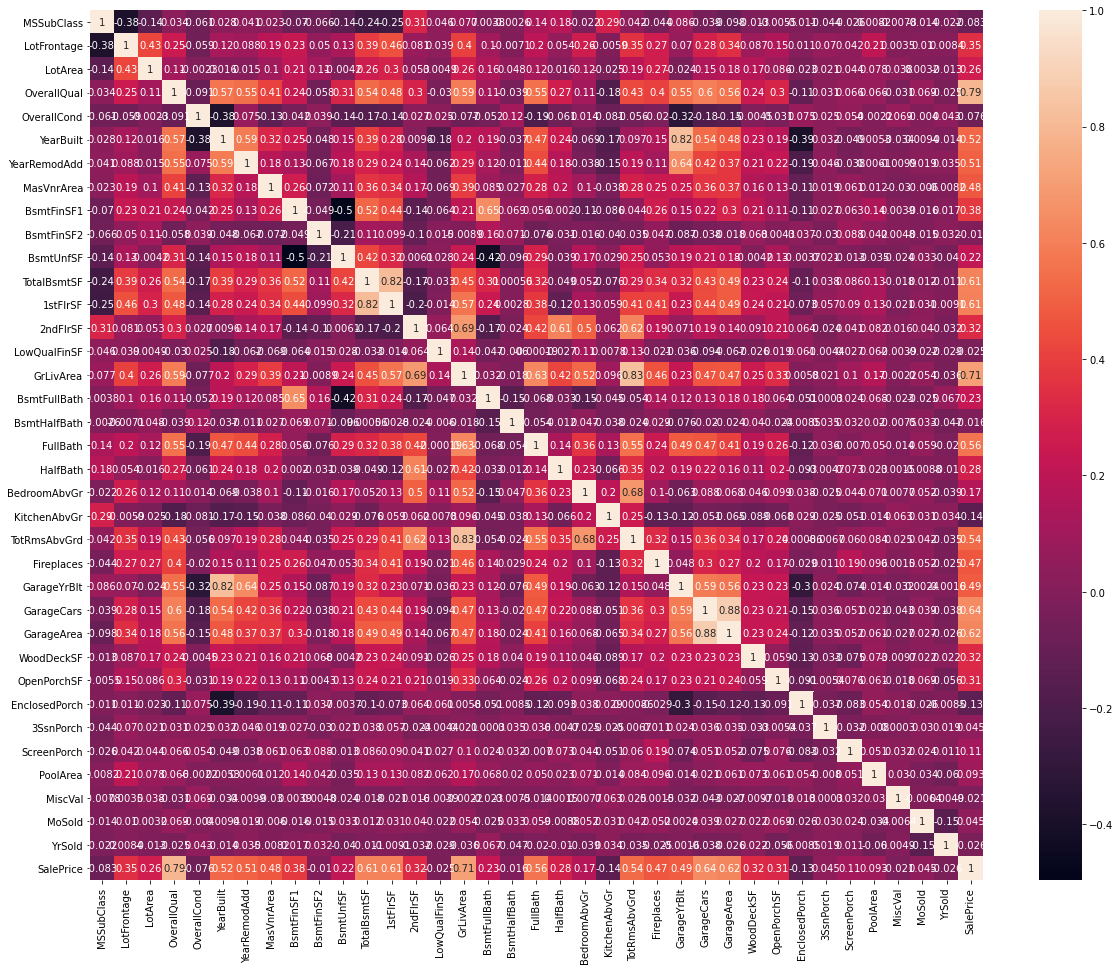

In [261]:
#plot the heatmap to have visual representaion of correlation in numeric variables
plt.figure(figsize=(20,16))
sns.heatmap(df_numerical.corr(),annot=True)
plt.show()

As we see from the heatmap, some variables have very high correlation with other variables
So, need to drop one feature from each 
# GarageCars and GarageArea (0.88)
# GarageYrBlt and YearBuilt (0.83)
# TotRmsAbvGrd and GrLivArea (0.83)
# TotalBsmtSF and 1stflrSF (0.82)

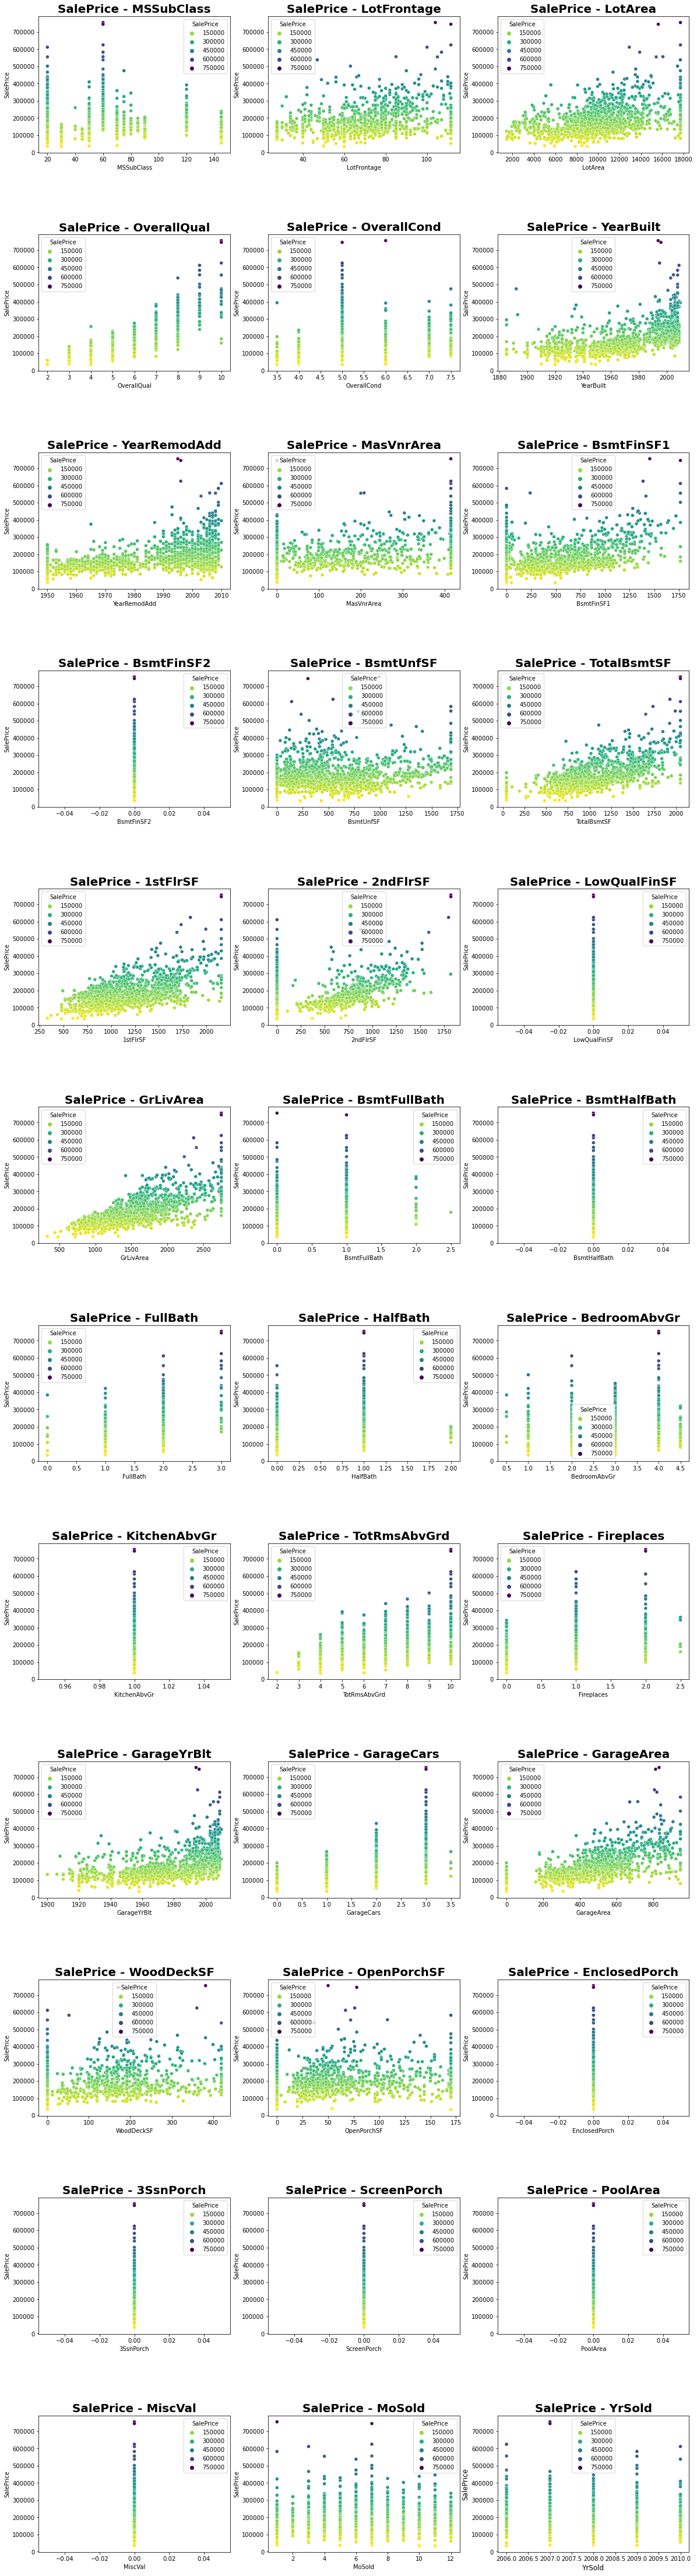

In [262]:
train_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

In [263]:
#As we see from result, below columns has single value and can be dropped.
columnstodrop = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
df = df.drop(columnstodrop,axis=1)
df.shape

(1452, 66)

In [264]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice

In [265]:
# 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
#analyse se numeric features with discrete values
disc_col = df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]
disc_col

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,1,3.0,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,2,0,3.0,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,2,1,3.0,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,1,0,3.0,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,2,1,4.0,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,1,3.0,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,2,0,3.0,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,2,0,4.0,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,1,0,2.0,5,0.0,1950.0,1950,1996


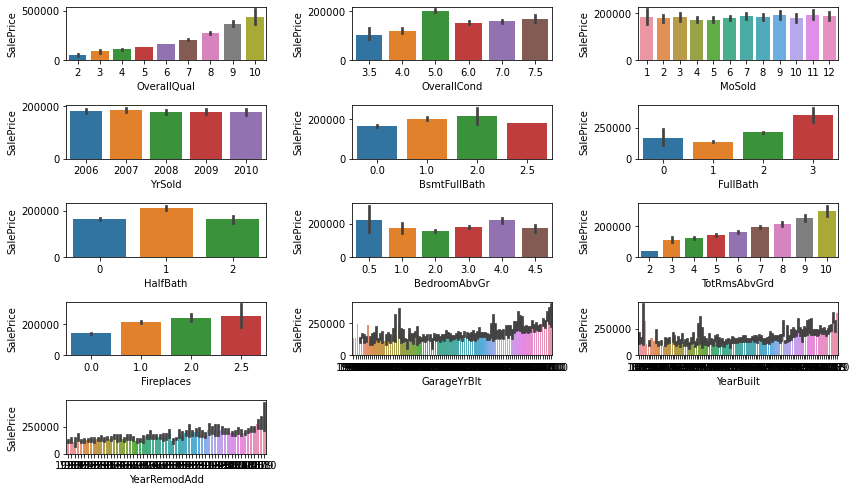

In [266]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(disc_col):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Comment: Following are the observations from the plots.

# 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

# 'OverallCond' : SalePrice is highest for rating 5

# 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

# 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice

# 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price
# 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

# 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

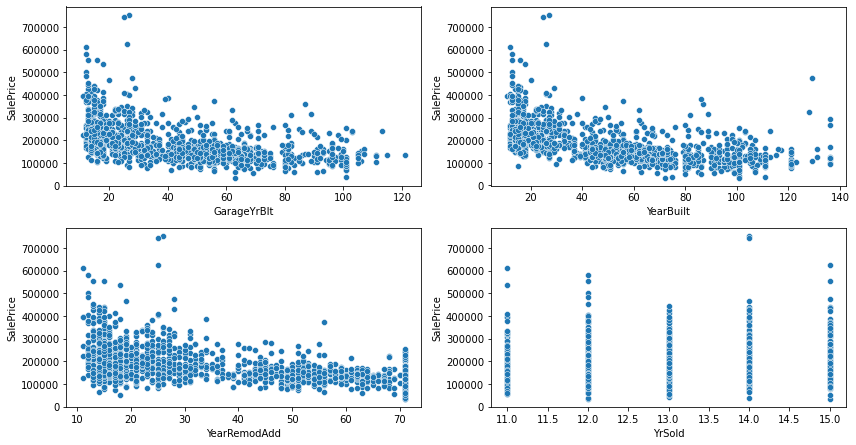

In [267]:
#Convert the year related columns into number of years and plot the graph
year_col = ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']
for feature in year_col:
    df[feature] = 2021 - df[feature]

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(year_col):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

In [268]:
# GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
# GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
# TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
# TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
highCorr_col = ['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF']
df = df.drop(highCorr_col,axis=1)
df.shape

(1452, 62)

#Analysis of Categorical features

In [269]:
df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [270]:

# For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
# For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
# For 'FireplaceQu'  Nan means 'No Fire place' 
# All these features will be imputed with meaningful values in place of missing data.

In [271]:
categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,]
print(df[categorical_features].isnull().sum())

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
FireplaceQu     686
dtype: int64


In [272]:
# Imputing missing values with "Not_applicable"
df[categorical_features] = df[categorical_features].fillna(value='Not_applicable', axis=1)

In [273]:
#Print - Missing percentage values
for feature in df.columns:
    if df[feature].isnull().any():
        print(feature, ':', round(df[feature].isnull().sum()/df.shape[0], 2)*100)

#Will impute the missing value after splitting into train and test data

LotFrontage : 18.0


In [274]:
#Function to generate the box plot
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'], df[feature])
        plt.tight_layout()

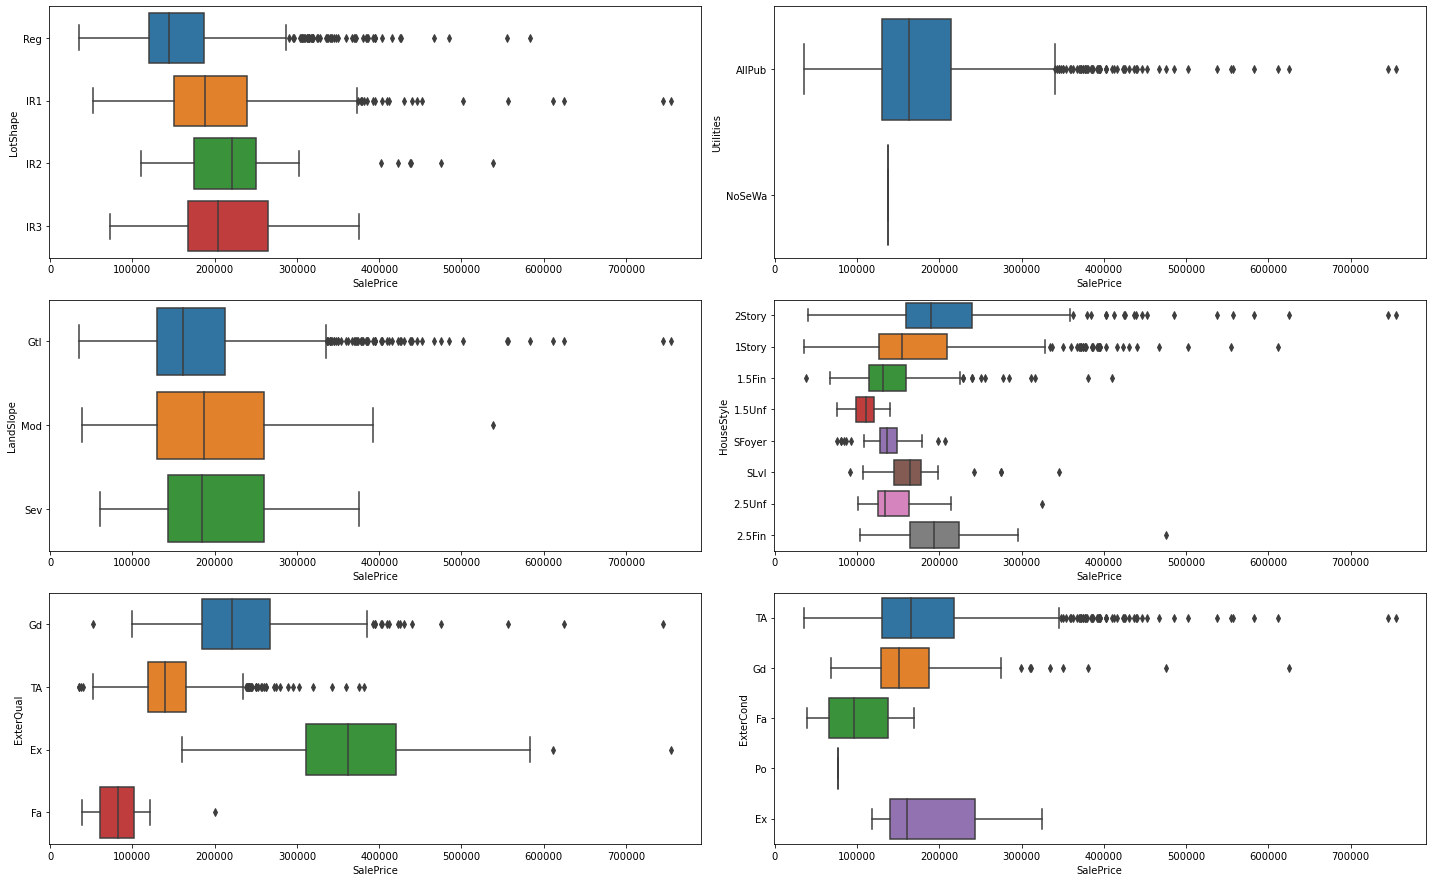

In [275]:
#Ordinal features
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)


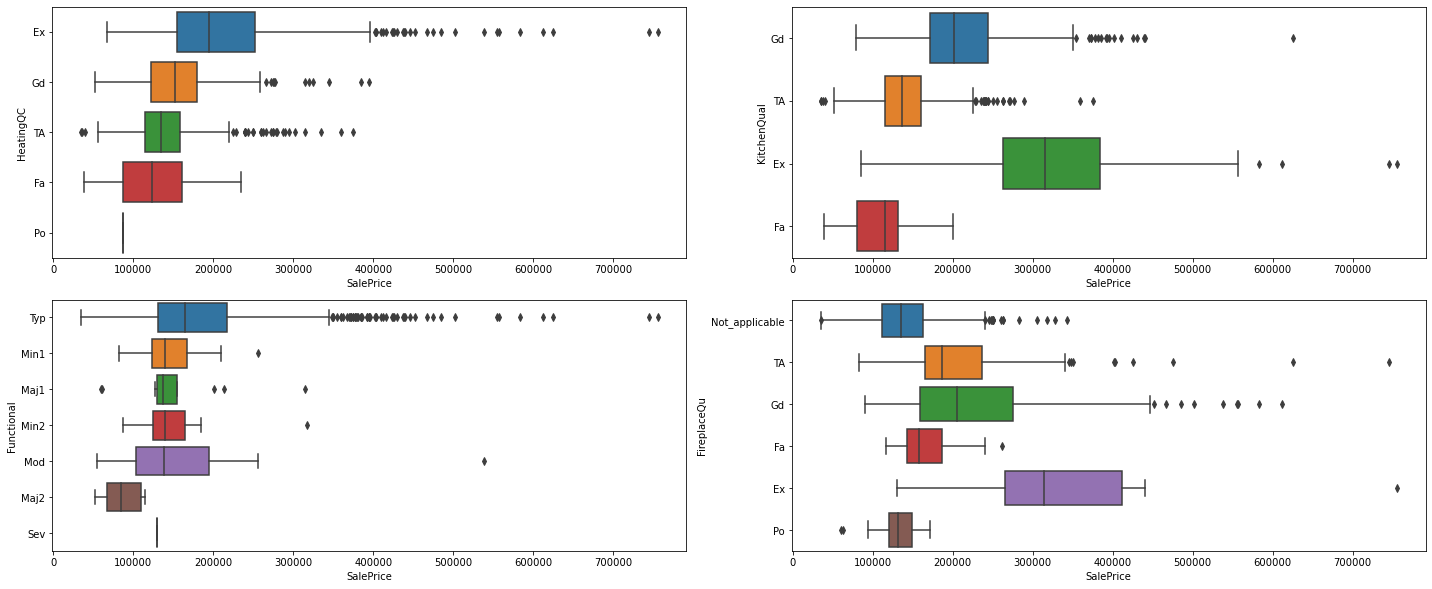

In [276]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

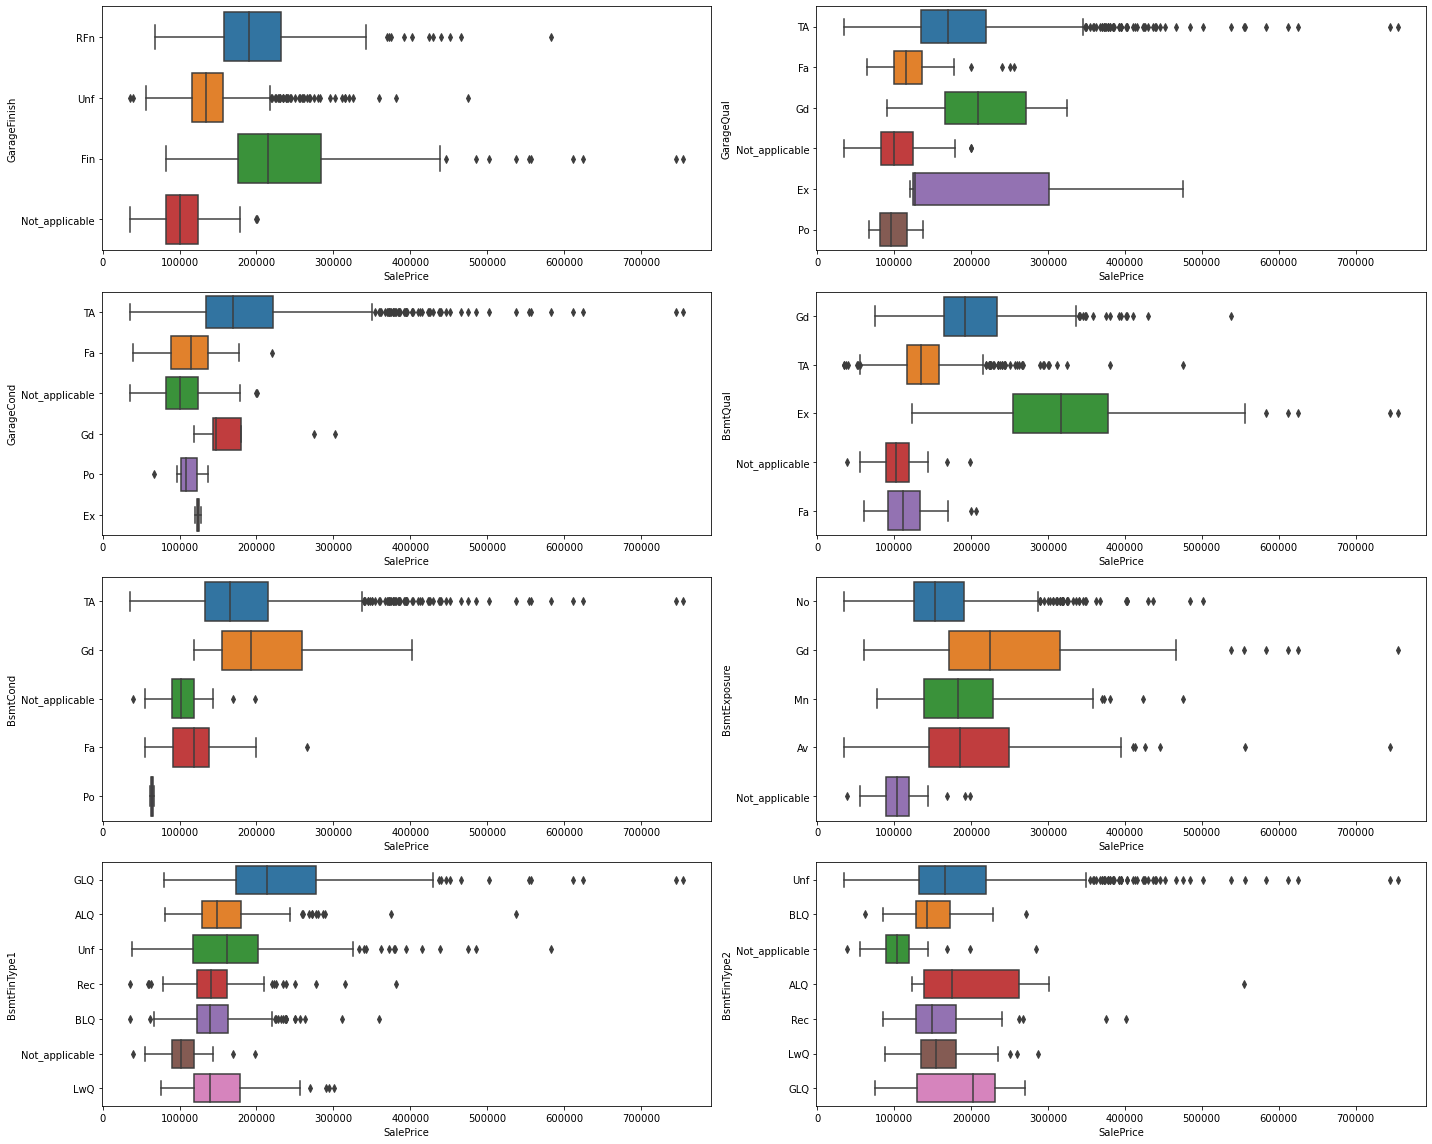

In [277]:
garage_basement_features = ['GarageFinish', 'GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
generate_boxplot(garage_basement_features)


In [278]:
df['LotShape'] = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utilities'] = df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Functional'] = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['FireplaceQu'] = df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [279]:
df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1452 non-null   int64
 1   Utilities     1452 non-null   int64
 2   LandSlope     1452 non-null   int64
 3   HouseStyle    1452 non-null   int64
 4   ExterQual     1452 non-null   int64
 5   ExterCond     1452 non-null   int64
 6   BsmtQual      1452 non-null   int64
 7   BsmtCond      1452 non-null   int64
 8   BsmtExposure  1452 non-null   int64
 9   BsmtFinType1  1452 non-null   int64
 10  BsmtFinType2  1452 non-null   int64
 11  HeatingQC     1452 non-null   int64
 12  KitchenQual   1452 non-null   int64
 13  Functional    1452 non-null   int64
 14  FireplaceQu   1452 non-null   int64
 15  GarageFinish  1452 non-null   int64
 16  GarageQual    1452 non-null   int64
 17  GarageCond    1452 non-null   int64
dtypes: int64(18)
memory usage: 247.8 KB


In [280]:
unordered_features = ['MSZoning', 'Street','LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType','PavedDrive', 'SaleType','SaleCondition']
df[unordered_features]

,MSZoning,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,Y,WD,Normal
1,RL,Pave,Lvl,FR2,Veenker,Feedr,Norm,1Fam,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Attchd,Y,WD,Normal
2,RL,Pave,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,Y,WD,Normal
3,RL,Pave,Lvl,Corner,Crawfor,Norm,Norm,1Fam,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Detchd,Y,WD,Abnorml
4,RL,Pave,Lvl,FR2,NoRidge,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Attchd,Y,WD,Normal
1456,RL,Pave,Lvl,Inside,NWAmes,Norm,Norm,1Fam,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,Attchd,Y,WD,Normal
1457,RL,Pave,Lvl,Inside,Crawfor,Norm,Norm,1Fam,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,Attchd,Y,WD,Normal
1458,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Attchd,Y,WD,Normal


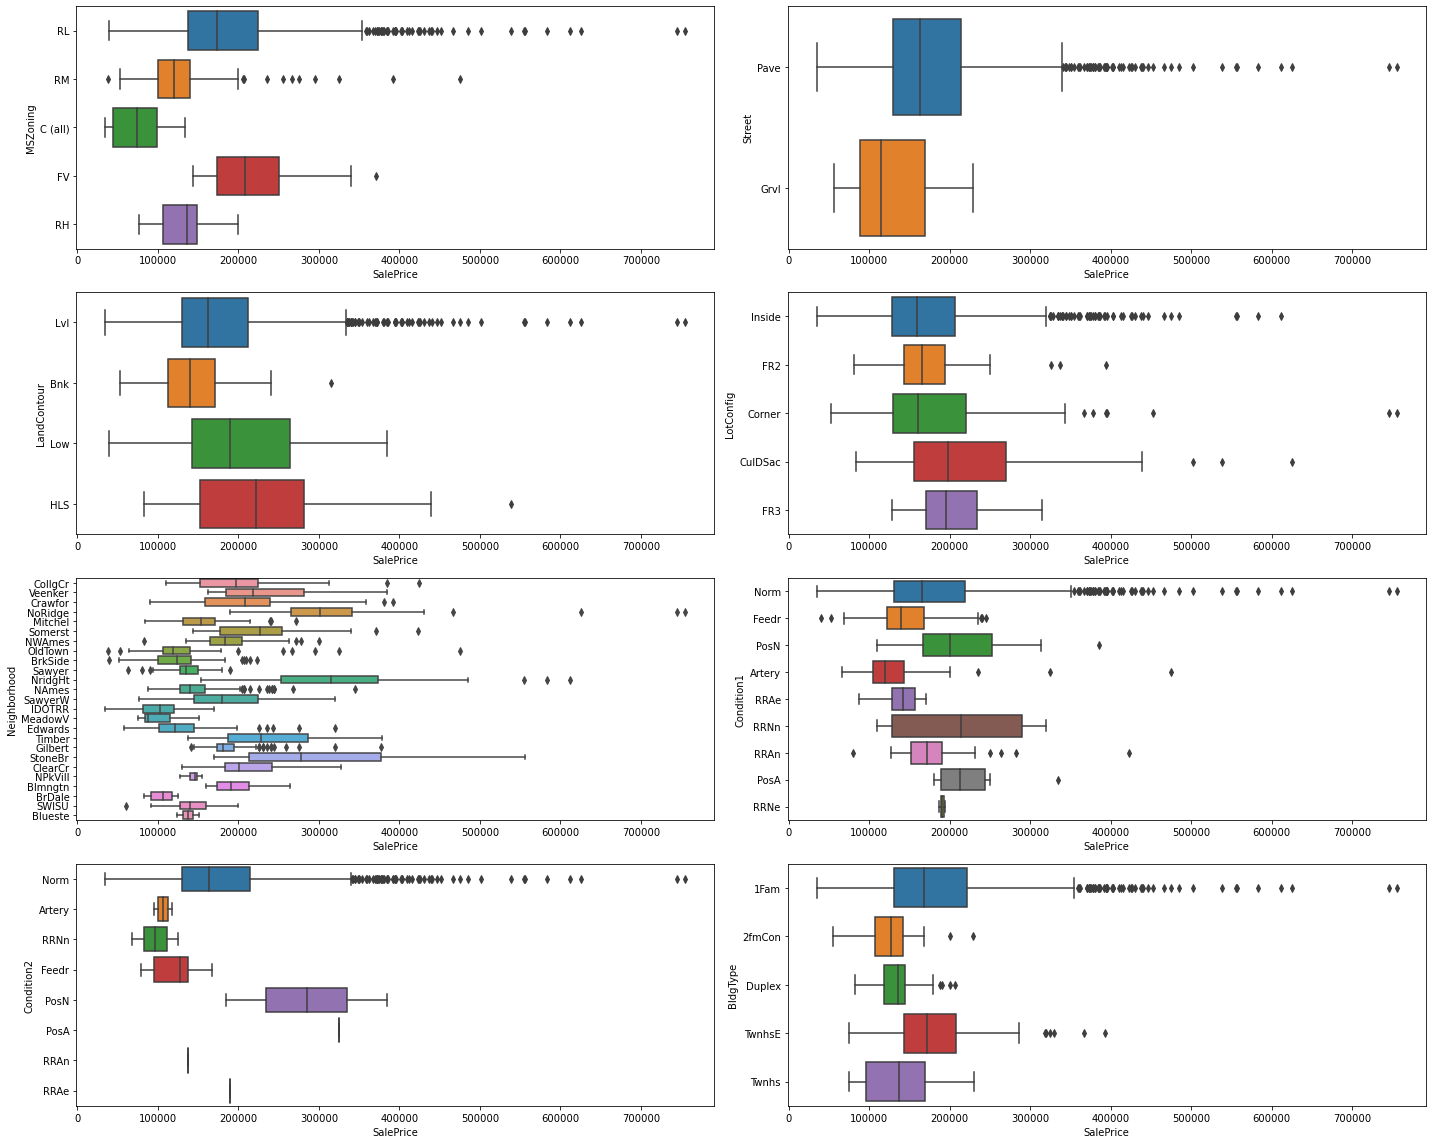

In [281]:
generate_boxplot(unordered_features[0:8])

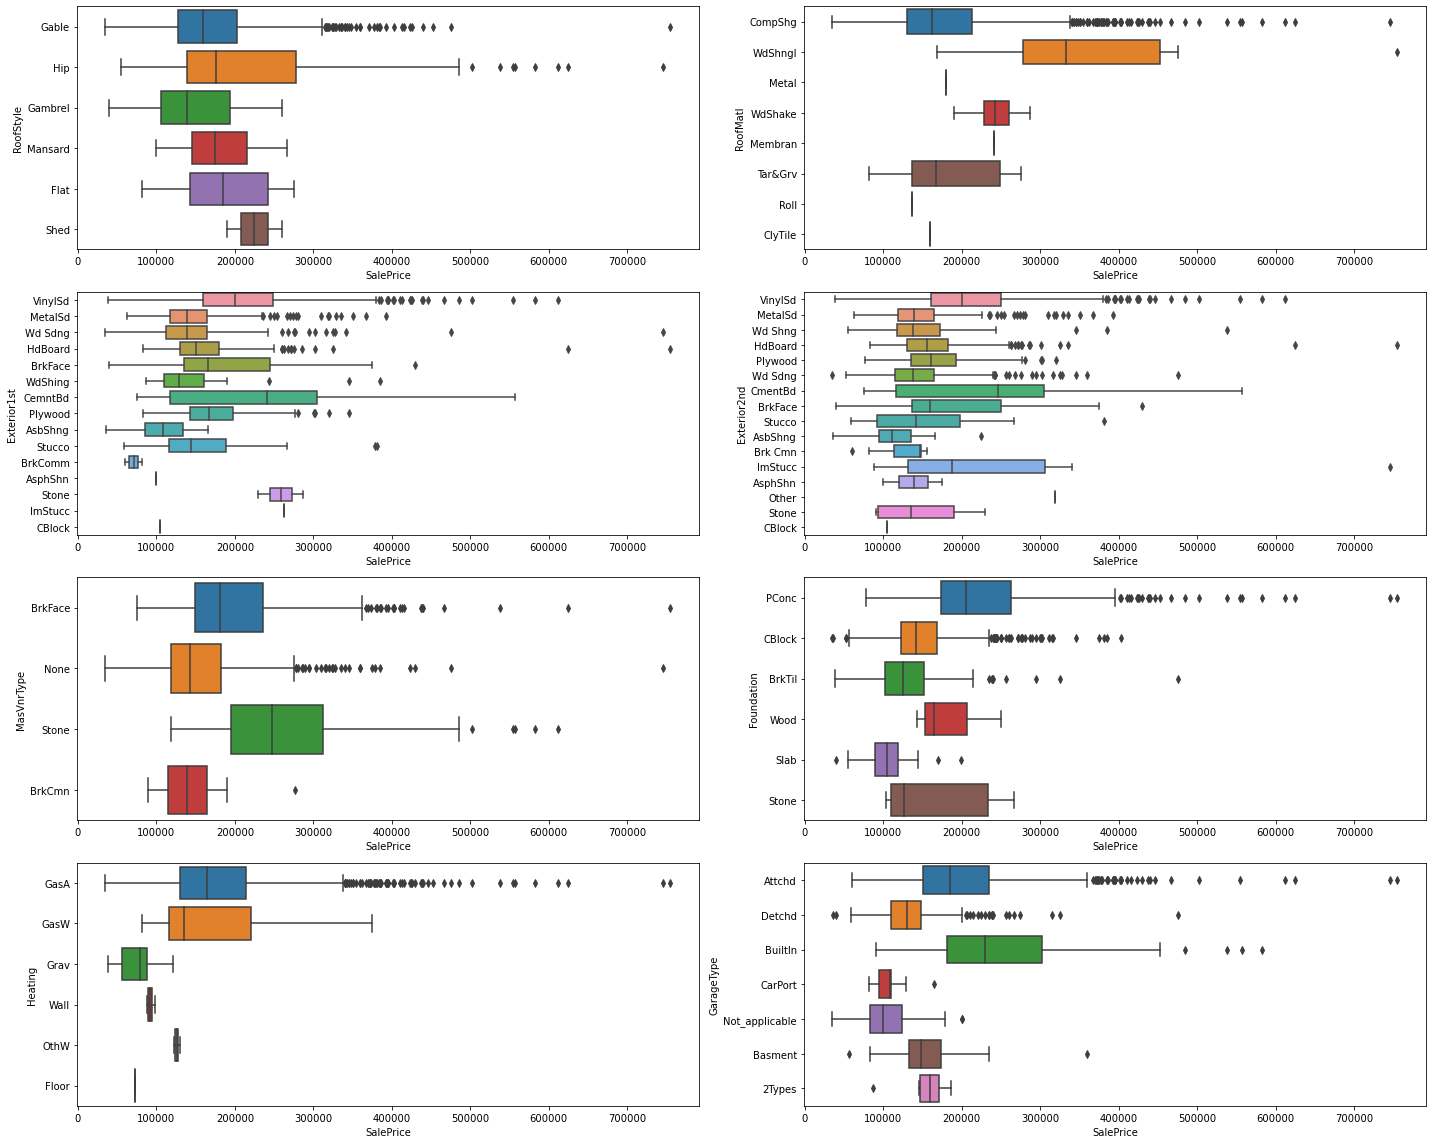

In [282]:
generate_boxplot(unordered_features[8:16])

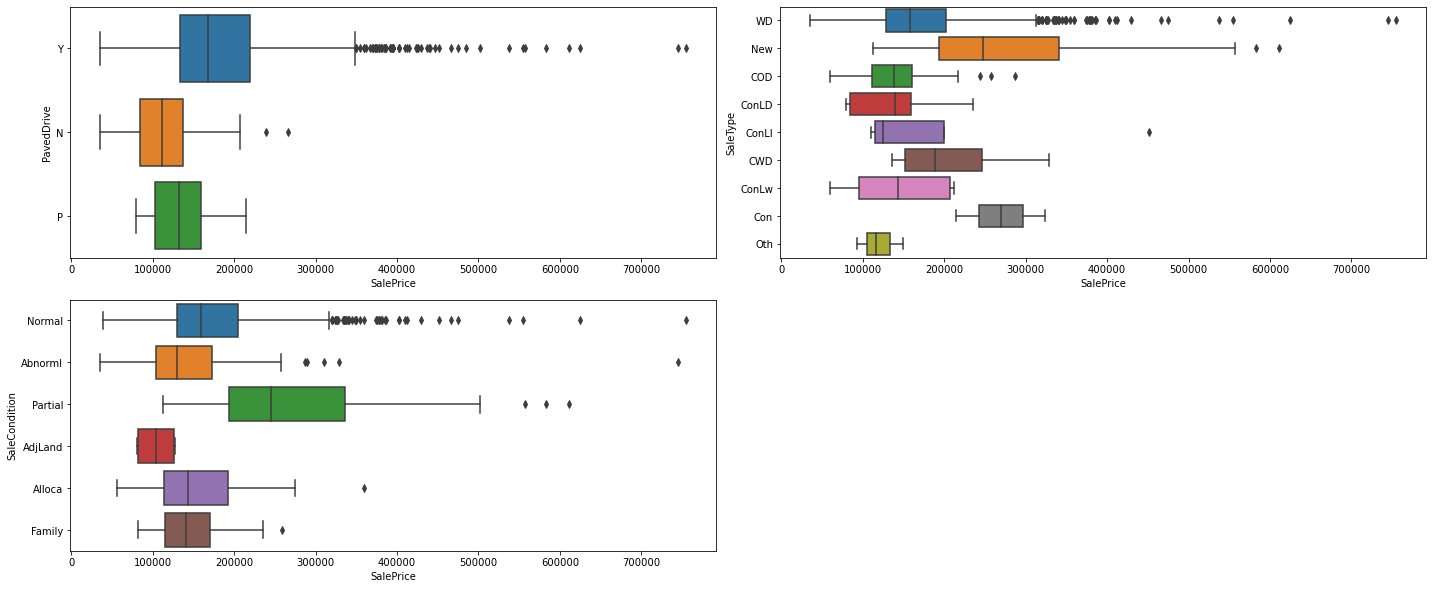

In [283]:
generate_boxplot(unordered_features[16:])

In [284]:
#encoding categorical variables
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)
dummy_df.shape

# Adding 130 features to the existing dataset will make the model very complex.
# From the above boxplots, for some categorical features only label is dominating over others.
# In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.
#So drop those dummies

(1452, 130)

In [285]:
dummies_to_drop = []
for feature in dummy_df.columns:
    if dummy_df[feature].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feature)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

#Drop the dummies
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_

In [286]:
#Combine the dummy_df with original df
df.shape

# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)


In [287]:
# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)
df.shape

(1452, 90)

#Splitting the data - Test and train data

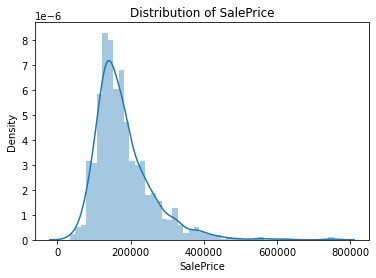

In [288]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()


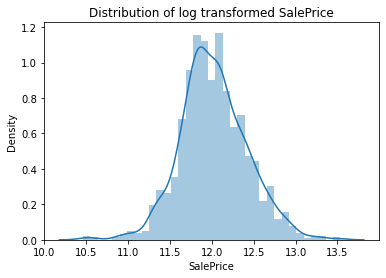

In [289]:
#Since the data is higly right skewed, checking the distribution of transformed SalesPrice
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [290]:
# log transformed SalePrice is normally distributed, hence transformed data can be used for model building

y = np.log(df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64


In [291]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,1,1,0,0,0,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,1,1,0,0,0,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,1,1,0,0,0,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,0,1,0,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,1,1,0,0,0,1,0,1,1,0


In [292]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 89)
(291, 89)
(1161,)
(291,)


In [293]:
#Imputing missing values of categorical variable LotFrontage after splitting the test and train data
X['LotFrontage'].isnull().any()
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [294]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [295]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [296]:
#Scaling of Features
stdscaler = StandardScaler()
stdscaler.fit(X_train)


StandardScaler()

In [298]:
X_tr_scaled = pd.DataFrame(data=stdscaler.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=stdscaler.transform(X_test), columns=X_test.columns)

In [299]:
# Checking the features after 
#train data
print(X_tr_scaled)

# test data
print(X_te_scaled) 

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0       1.733674     0.000000 -1.806591 -1.383693   0.029361  -0.223316   
1       2.399281    -2.375108 -1.977986  0.747843   0.029361  -0.223316   
2      -0.928754     0.055784 -0.468093  0.747843   0.029361  -0.223316   
3      -0.928754     0.000000 -0.413939 -1.383693   0.029361  -0.223316   
4      -0.928754     0.055784 -0.468093  0.747843   0.029361  -0.223316   
...          ...          ...       ...       ...        ...        ...   
1156   -0.928754     0.627759  0.310721 -1.383693   0.029361  -0.223316   
1157    2.399281    -2.375108 -2.236473  0.747843   0.029361  -0.223316   
1158   -0.130026    -1.088165 -0.169687  0.747843   0.029361  -0.223316   
1159   -0.928754    -1.202560  0.286714 -0.673181   0.029361  -0.223316   
1160   -0.928754    -0.115808  0.292576 -1.383693   0.029361  -0.223316   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  Heating_GasA  \
0      -0.832872     0.

In [300]:
#Initial Feature Selection with RFE
def top_n_features(n):
    top_n_cols = []
    global X_tr_scaled, y_train
    
    linear_m = LinearRegression()
    rfe = RFE(linear_m, n_features_to_select = n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [301]:
#print top 45,50,60 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF'

In [303]:
# Given the training data and list of features, this below definition will provide the statistical summary of the model
# and it will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [304]:
#Top 45 features
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     236.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:29:51   Log-Likelihood:                 810.48
No. Observations:                1161   AIC:                            -1529.
Df Residuals:                    1115   BIC:                            -1296.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [305]:
#Top 45 features
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:30:31   Log-Likelihood:                 819.85
No. Observations:                1161   AIC:                            -1538.
Df Residuals:                    1110   BIC:                            -1280.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
#Function to generate the box plot
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'], df[feature])
        plt.tight_layout()

In [306]:
#Top 45 features
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     196.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:30:40   Log-Likelihood:                 825.62
No. Observations:                1161   AIC:                            -1539.
Df Residuals:                    1105   BIC:                            -1256.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [307]:
top_60= top_n_features(60)
build_regressor(X_tr_scaled,y_train,top_60)

Top 60 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'Garag

In [308]:
# Comment: By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 55 and 60 features have the same adjusted R-squared value on the training data.

X_train_rfe = X_tr_scaled[top_55]
X_test_rfe = X_te_scaled[top_55]


In [310]:
#Cross-validation, Model Building and Model Evaluation
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [313]:
#Ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10.0
R2 score (train) :  0.9072774545781042
R2 score (test) :  0.9091351556124424
RMSE (train) :  0.11891793012969919
RMSE (test) :  0.12959462441387434


Comment: Ridge Regression model was able to achieve R2 score of 0.90 on test data i.e. 90% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1295 on test data, that means the prediction made by the model can off by 0.1295 unit.

In [314]:
#Lasso Regression
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9061713091219732
R2 score (test) :  0.9128058389675673
RMSE (train) :  0.11962515048706197
RMSE (test) :  0.12695001176254636


In [315]:
#Comparing model coeff

model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.007885,-0.006515
LotFrontage,0.008243,0.006286
LotArea,0.025387,0.025743
LandSlope,0.010508,0.010046
OverallQual,0.078786,0.080796
OverallCond,0.048011,0.048712
YearBuilt,-0.032438,-0.034543
BsmtQual,0.022762,0.023078
BsmtExposure,0.010205,0.009221
BsmtFinSF1,0.025673,0.026366


In [316]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[290438 219050 136760 117216 131494]


# Final Model
# Lasso Regression produced slightly higher R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [318]:

# 55 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)


# In[123]:


model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'SaleCondition_Normal', 'BsmtFinSF1',
       'LotArea', 'BsmtQual', 'GarageArea'],
      dtype='object')

# Summary
#First the housing data is read and analyzed dividing the features into numerical and categorical types.

#SalePrice is the target column here.

#All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.

#New features are extracted, redundant features dropped and categorical features are encoded accordingly.

#Then the data in split into train and test data and feature scaling is performed.

#Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

#Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

#Top 55 features are selected through RFE and adjusted R-square. 50 features : [''MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']

#Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.

#Model evaluation is done with R2 score and Root Mean Square Error.

#Lasso Regression is chosen as final model for having slightly better R-square value on test data.

#Out of 55 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'SaleCondition_Normal', 'BsmtFinSF1',
       'LotArea', 'BsmtQual', 'GarageArea']

#Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.120217 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.

#Predicted value of SalePrice is tranformed into its original scale by performing antilog.



# Subjective Questions coding




In [319]:


ridge_model = Ridge(alpha=18.0) 
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))



Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9071
R2 score (test) :  0.9099
RMSE (train) :  0.1191
RMSE (test) :  0.1291


In [320]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9073
R2 score (test) :  0.9095
RMSE (train) :  0.1189
RMSE (test) :  0.1293


In [321]:
model_coefficients['Ridge (alpha = 18.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
MSSubClass,-0.007885,-0.006515,-0.007466,-0.008003
LotFrontage,0.008243,0.006286,0.008596,0.007480
LotArea,0.025387,0.025743,0.025882,0.024873
LandSlope,0.010508,0.010046,0.010430,0.010474
OverallQual,0.078786,0.080796,0.078537,0.079601
OverallCond,0.048011,0.048712,0.047502,0.048680
YearBuilt,-0.032438,-0.034543,-0.030414,-0.035295
BsmtQual,0.022762,0.023078,0.022969,0.022560
BsmtExposure,0.010205,0.009221,0.010297,0.009860
BsmtFinSF1,0.025673,0.026366,0.025794,0.025785


In [322]:

model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(1)


,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.118516,0.120217,0.115233,0.122506


In [323]:


model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)


,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.118516,0.120217,0.115233,0.122506
2ndFlrSF,0.097859,0.099088,0.094302,0.102063
OverallQual,0.078786,0.080796,0.078537,0.079601
OverallCond,0.048011,0.048712,0.047502,0.048680
SaleCondition_Partial,0.031815,0.028114,0.027077,0.029492


In [325]:

X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [327]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [328]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [329]:
lasso_model.coef_

array([-0.        ,  0.01955891,  0.04484017,  0.00529705,  0.03726861,
        0.04207938,  0.01889342,  0.03607945,  0.02542938,  0.02994055,
        0.01416063,  0.08614839,  0.04422496,  0.05739908, -0.02290242,
        0.02326421,  0.03227471,  0.01018748,  0.05578066,  0.01719281,
        0.01997978,  0.01934103,  0.01567143,  0.01708831, -0.02490367,
       -0.01135708, -0.00793191,  0.0179302 , -0.00691848,  0.01663137,
        0.01692476,  0.01063135, -0.03898655, -0.0133973 ,  0.00268848,
       -0.01936285, -0.0323099 ,  0.01003324,  0.02835312,  0.02515339,
        0.01282388,  0.01752219,  0.02247325, -0.01329232,  0.01921425,
        0.0100306 ,  0.02137484,  0.01288926,  0.02616425,  0.02059004])

In [330]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.086148
KitchenQual,0.057399
GarageArea,0.055781
LotArea,0.044840
HalfBath,0.044225
